### Problem 1
Từ dữ liệu về chiều cao, cân nặng trong file **Data_hight_weight_of_female.xlsx** bạn hãy dùng Linear Regression để dự đoán cân nặng dựa vào chiều cao, và trực quan hóa

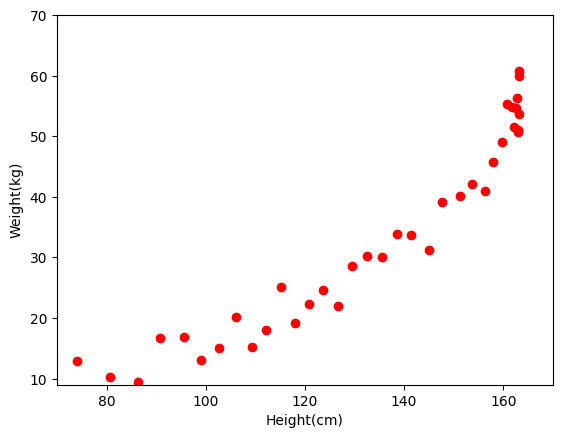

In [59]:
# Code ở đây
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('Data_height_weight_of_female.xlsx')
df['Chiều cao'] = [s.replace('cm','')for s in df['Chiều cao']]
df['Cân nặng'] = [s.replace('kg','')for s in df['Cân nặng']]
df['Chiều cao'] = df['Chiều cao'].astype(float)

df['Cân nặng'] = df['Cân nặng'].astype(float)
D = np.array([df['Chiều cao']]).T
L = np.array([df['Cân nặng']]).T
plt.plot(D,L,'ro')
plt.axis([70, 170 ,9,70])
plt.xlabel('Height(cm)')
plt.ylabel('Weight(kg)')
plt.show()

In [63]:
L.shape

(37, 1)

w=  [[-39.81602278]
 [  0.55282316]]
[ 70. 170.]
[-1.11840181 54.16391386]


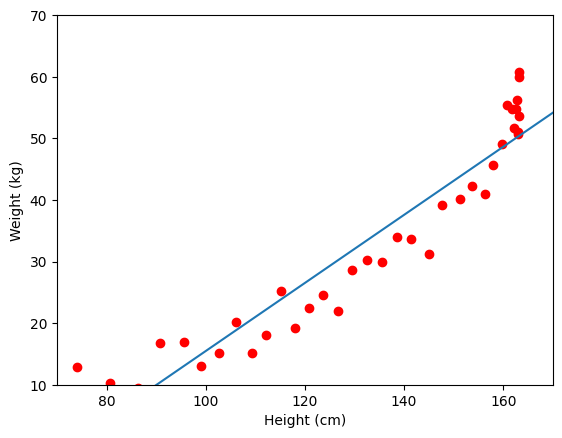

In [65]:
one = np.ones((D.shape[0],1))
Xbar = np.concatenate((one,D),axis=1)

A = np.dot(Xbar.T,Xbar)
b = np.dot(Xbar.T,L)
w = np.dot(np.linalg.pinv(A),b)
print('w= ', w)

w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(70, 170, 2) 
print(x0)
y0 = w_0 + w_1*x0
print(y0)

plt.plot(D.T, L.T, 'ro')    
plt.plot(x0, y0)               
plt.axis([70, 170, 10, 70])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [68]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0

print( u'Predict weight of person with height 155 cm: %.2f (kg), real number: 44 (kg)'  %(y1) )
print( u'Predict weight of person with height 160 cm: %.2f (kg), real number: 50 (kg)'  %(y2) )

Predict weight of person with height 155 cm: 45.87 (kg), real number: 44 (kg)
Predict weight of person with height 160 cm: 48.64 (kg), real number: 50 (kg)


### Problem 2
Từ dữ liệu file **Data_GPA_harvard.xlsx** bạn hãy dùng Linear Regression để dự đoán Điểm GPA của một sinh viên dựa vào chỉ số IQ và thời gian học trong một ngày của sinh viên đó

In [87]:
# Code ở đây

df2 = pd.read_excel('Data_GPA_harvard.xlsx')
D2 = np.array([df2['IQ'],df2['hours per day']]).T
L2 = np.array([df2['GPA']]).T


In [96]:
from sklearn import datasets, linear_model
one2 = np.ones((D2.shape[0],1))
Xbar2 = np.concatenate((one2,D2),axis=1)
regr = linear_model.LinearRegression(fit_intercept=False) 
regr.fit(Xbar2, L2)
print( 'Solution found by scikit-learn  : ', regr.coef_ )
w_0 = regr.coef_[0][0]
w_1 = regr.coef_[0][1]
w_2 = regr.coef_[0][2]

y_0 = w_0 + w_1*130 + w_2*12

print('Solution ',y_0)

Solution found by scikit-learn  :  [[0.00351354 0.01911752 0.07644387]]
Solution  3.406118142856678
